<h3>import package</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy.optimize as opt

<h3>data collecting /Read data</h3>

In [3]:
df=pd.read_csv("mcdonalds.csv")

In [4]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [8]:
df.describe

<bound method NDFrame.describe of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  G

In [9]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [10]:
#show 1st 3 data
print(df.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


<h3>Exploring data<h3/>

In [11]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [12]:
#shape /dimension

df.shape

(1453, 15)

In [13]:
MD_x=np.array(df.iloc[:,0:11])
MD_x=(MD_x =="Yes") + 0
np.round(np.mean(MD_x,axis=0),2)

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [14]:
from sklearn.preprocessing import LabelEncoder
def labels(x):
    df[x]=LabelEncoder().fit_transform(df[x])
    return df

columns=["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty",
         "expensive","healthy","disgusting"]

for i in columns:
    labels(i)
df    

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [15]:
x=df.loc[:,columns].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [16]:
y=df.loc[:,columns]
y

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [17]:
#principal components 
from sklearn.decomposition import PCA
from sklearn import preprocessing

MD_pca=preprocessing.scale(x)

pca=PCA(n_components=11)
pc=pca.fit_transform(x)
col=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11"]
mac=pd.DataFrame(data=pc,columns=col)
mac

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [18]:
#fit pca data summary
MD_pca= PCA().fit(MD_x)

print("Proportion of variance explained by pc..")
print(MD_pca.explained_variance_ratio_)
print("\n cumulative proportion of variance explained..")

print(np.cumsum(MD_pca.explained_variance_ratio_))

Proportion of variance explained by pc..
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

 cumulative proportion of variance explained..
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [19]:
loadings=pca.components_
num_pc=pca.n_features_
pc_list=["PC"+str(i) for i in list(range(1,num_pc+1))]
loadings_df=pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df['variable']=y.columns.values
loadings_df=loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


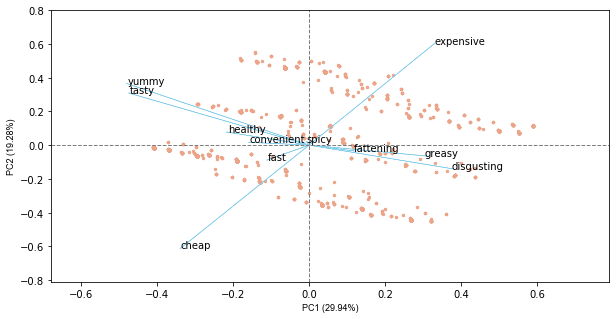

In [20]:
pca_scores=PCA().fit_transform(x)
from bioinfokit.visuz import cluster
#get 2d biplot

cluster.biplot(cscore=pca_scores,loadings=loadings,labels=df.columns.values,var1=round(pca.explained_variance_ratio_[0]*100,2),
              var2=round(pca.explained_variance_ratio_[1]*100,2),show=True,dim=(10,5))

In [21]:
#print sd from pc
print("standard deviation",np.round(MD_pca.explained_variance_ **0.5,1))

standard deviation [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [22]:
rotation=MD_pca.components_

In [23]:
print("rotation(n*k)=(11*11):")
print(rotation.shape)

rotation(n*k)=(11*11):
(11, 11)


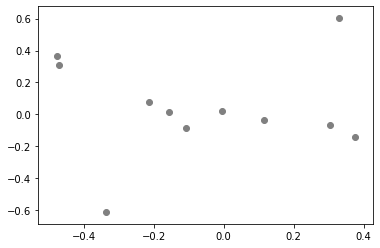

In [24]:
plt.scatter(MD_pca.components_[0],MD_pca.components_[1],c='grey')
plt.show()

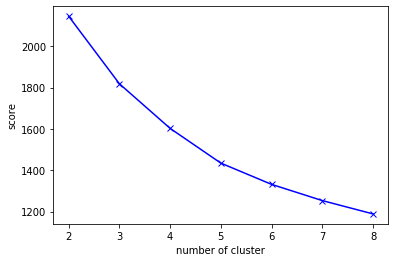

In [25]:
#seeds
from sklearn.cluster import KMeans
np.random.seed(1234)
#perform k-means clustring

scores=[]
for k in range(2,9):
    kmeans=KMeans(n_clusters=k,random_state=1234)
    kmeans.fit(MD_x)
    scores.append(kmeans.inertia_)
    
#plot the k-means
plt.plot(range(2,9),scores,'bx-')
plt.xlabel("number of cluster")
plt.ylabel("score")
plt.show()

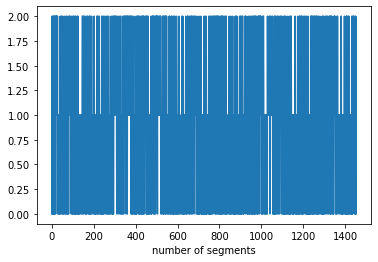

In [26]:
# relabel the clusters
best_k = 3  
# choose the number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=best_k, random_state=1234)
kmeans.fit(MD_x)
MD_km28 = kmeans.labels_
plt.plot(MD_km28)
plt.xlabel("number of segments")

plt.show()


In [27]:
np.random.seed(1234)
inertias = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(MD_x)
    inertias.append(kmeans.inertia_)
    print(f"k={k}, inertia={kmeans.inertia_:.2f}")

print("Inertia values:", inertias)


k=2, inertia=2145.50
k=3, inertia=1829.77
k=4, inertia=1603.43
k=5, inertia=1434.83
k=6, inertia=1341.19
k=7, inertia=1283.99
k=8, inertia=1175.83
Inertia values: [2145.503726917158, 1829.7722890939158, 1603.4266013972679, 1434.8267880007443, 1341.1856723734936, 1283.9931665539434, 1175.8315967720805]


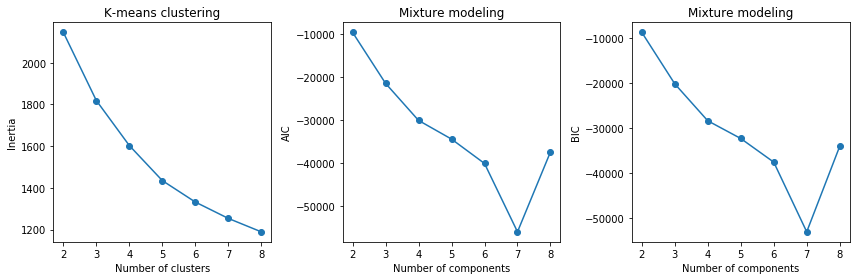

In [28]:
from sklearn.mixture import GaussianMixture
# K-means clustering
k_range = range(2,9)
k_models = [KMeans(n_clusters=k, random_state=1234).fit(MD_x) for k in k_range]
k_inertias = [model.inertia_ for model in k_models]

# Mixture modeling
m_range = range(2,9)
m_models = [GaussianMixture(n_components=m, covariance_type='full', random_state=1234).fit(MD_x) for m in m_range]
m_aics = [model.aic(MD_x) for model in m_models]
m_bics = [model.bic(MD_x) for model in m_models]

# Plot AIC, BIC, and inertia
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].plot(k_range, k_inertias, '-o')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('K-means clustering')
ax[1].plot(m_range, m_aics, '-o')
ax[1].set_xlabel('Number of components')
ax[1].set_ylabel('AIC')
ax[1].set_title('Mixture modeling')
ax[2].plot(m_range, m_bics, '-o')
ax[2].set_xlabel('Number of components')
ax[2].set_ylabel('BIC')
ax[2].set_title('Mixture modeling')
plt.tight_layout()

plt.show()


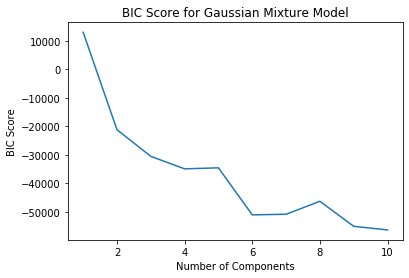

In [29]:
np.random.seed(1234)

# assume mcdonalds is a dataset for the model
# assume X is the data matrix with the relevant features

# calculate the BIC score for different numbers of components
bic_scores = []
max_components = 10
for k in range(1, max_components+1):
    gmm = GaussianMixture(n_components=k, n_init=10, verbose=0)
    gmm.fit(x)
    bic_scores.append(gmm.bic(x))

# plot the BIC score for different numbers of components
plt.plot(range(1, max_components+1), bic_scores)
plt.xlabel("Number of Components")
plt.ylabel("BIC Score")
plt.title("BIC Score for Gaussian Mixture Model")
plt.show()


In [30]:

# create a dataframe from the given dataset
data = {
    'yummy': ['No'],
    'convenient': ['Yes'],
    'spicy': ['No'],
    'fattening': ['Yes'],
    'greasy': ['No'],
    'fast': ['Yes'],
    'cheap': ['Yes'],
    'tasty': ['No'],
    'expensive': ['Yes'],
    'healthy': ['No'],
    'disgusting': ['No'],
    'Like': [-3],
    'Age': [61],
    'VisitFrequency': ['Every three months'],
    'Gender': ['Female']
}
mcdonalds = pd.DataFrame(data)

# calculate the mean visit frequency for each group of age using tapply in R
visit = mcdonalds['VisitFrequency'].groupby(mcdonalds['Age'] // 4).apply(lambda x: x.value_counts().index[0])

# calculate the proportion of females for each group of age using tapply in R
female = mcdonalds['Gender'].eq('Female').groupby(mcdonalds['Age'] // 4).mean()

print(visit)
print(female)


Age
15    Every three months
Name: VisitFrequency, dtype: object
Age
15    True
Name: Gender, dtype: bool


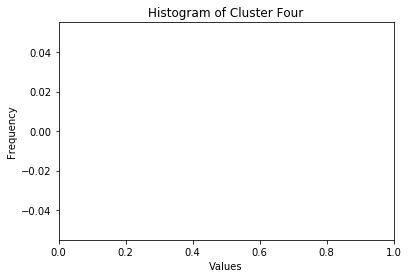

In [31]:
#apply k-means clustering 
cluster_four = MD_x[MD_km28 == 3]

# plot the histogram
plt.hist(cluster_four, range=[0,1])
plt.xlim(0,1)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Four')
plt.show()

In [32]:
MD_k4 = MD_km28[3]

In [33]:
 # Apply k-means clustering with k=28
MD_k4 = KMeans(n_clusters=4, random_state=42)
MD_k4.fit(MD_x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [34]:
cluster_four = MD_x[MD_k4.labels_ == 3]

In [35]:
cluster_four

array([[1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0]])

In [36]:

df['cluster_num']= MD_k4.labels_


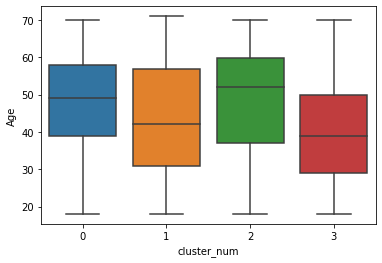

In [37]:
#box plot for age
import seaborn as sns
sns.boxplot(x="cluster_num", y="Age", data=df)


In [38]:
#gender
from sklearn.preprocessing import LabelEncoder
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
Gender=df.groupby('cluster_num')['Gender'].mean()
Gender=Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.581967
1,1,0.398276
2,2,0.407643
3,3,0.520635


In [39]:
#like
df['Like']=LabelEncoder().fit_transform(df['Like'])
Like=df.groupby('cluster_num')['Like'].mean()
Like=Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.737705
1,1,3.794828
2,2,5.417197
3,3,3.780952


In [40]:
#VisitFrequency
df['VisitFrequency']=LabelEncoder().fit_transform(df['VisitFrequency'])
visit=df.groupby('cluster_num')['VisitFrequency'].mean()
visit=visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.672131
1,1,2.584483
2,2,2.805732
3,3,2.542857


In [41]:
segment=Gender.merge(Like,on='cluster_num',how='left').merge(visit,on='cluster_num',how='left')

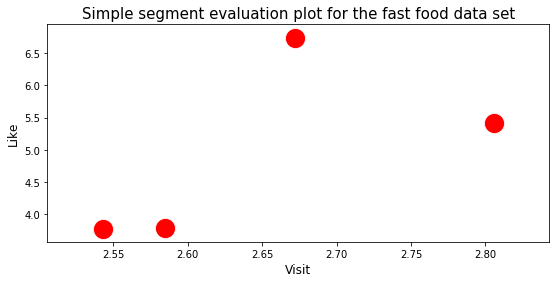

In [43]:
#Target segments
import matplotlib.pyplot as plt
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()